# Surprisal and evidence (Chapter 4)

This notebook covers the code to generate Figures 4.4, 4.5, and 4.6 in Chapter 4 of the textbook "Fundamentals of Active Inference".

==========================================================================
* **Author**: Sanjeev Namjoshi (sanjeev.namjoshi@gmail.com)

* **Version**: 0.1

*This Jupyter notebook should only be distributed to members of the "Fundamentals of Active Inference" reading group hosted by the Active Inference Institute.*

Package versions:
* matplotlib==3.5.3
* numpy==1.21.5
* pyro-ppl==1.8.4
* pytorch==1.13.1

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torch

from pyro.distributions import Normal

plt.rcParams.update({
    "figure.dpi": 120})

mpl.style.use("seaborn-deep")

## Surprisal of specific values of a probability distribution

In this book **surprisal** is an extremely important topic that will come up again and again. The formula for surprisal is

$$
-\log p(y)
$$

In most cases when we apply surprisal it will be to the *model evidence* (explained below). But surprisal generically applies to any probability distribution's values. In order to understand how it works, let's take a look at a normal distribution and calculate surprisal at every point along this (discretized) distribution. First we need a function for surprisal.

In [2]:
def surprisal(p_y: torch.tensor) -> torch.tensor:
    return -torch.log(p_y)

We will plot surprisal for distribution $p(y) = \mathcal{N}(\mu=0, \sigma=0.8)$ across the range of values from $-2$ to $2$.

In [3]:
y_range = torch.linspace(-2, 2, 500)   # Range of y
prob_range = torch.linspace(0, 1, 500) 
p_y = torch.exp(Normal(loc=0, scale = 0.8).log_prob(y_range))
surp = -torch.log(p_y)

<Figure size 768x576 with 0 Axes>

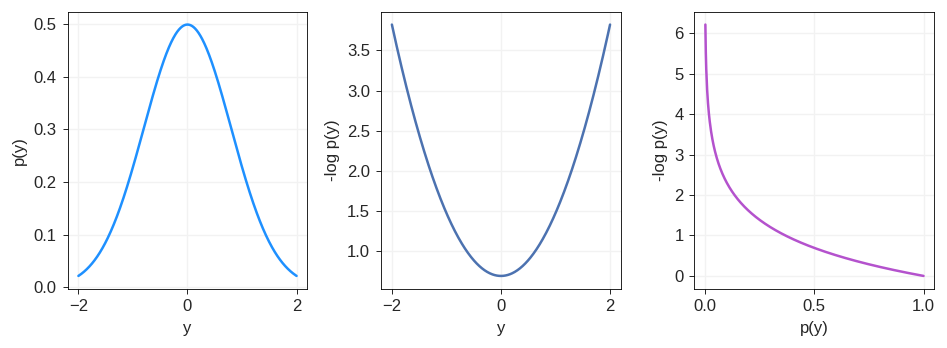

In [4]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1, 3, facecolor=(1,1,1), figsize=(8,3))

# Main plot
axes[0].plot(y_range, p_y, c="#1E90FF", label="p(y)")
axes[1].plot(y_range, surp, label="-log p(y)")
axes[2].plot(prob_range, surprisal(prob_range), c="#B452CD")

# Axis labels
axes[0].set_xlabel("y")
axes[0].set_ylabel("p(y)")
axes[1].set_xlabel("y")
axes[1].set_ylabel("-log p(y)")
axes[2].set_xlabel("p(y)")
axes[2].set_ylabel("-log p(y)")

# Cosmetic changes and axes ranges
for ax in axes:
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)

fig.tight_layout()

Based on this we can see that surprisal is HIGH when we are under the greatest probability density of the distribution. Surprisal is LOW when we are at the tails of the distribution. This is simply due to the inverse relationship between the two quantities through the negative log. 

## Relationship between surprisal and evidence

Recall Bayes' Theorem:

$$
p(x \mid y) = \frac{p(y \mid x)p(x)}{p(y)}
$$

The distribution $p(y)$ is known as the **model evidence** or just **evidence**. In many realistic scenarios, this quantity can be difficult to calculate. $p(y)$ is a normalizing factor that we divide by to ensure that the generative model $p(x, y)$ integrates to $1$. Model evidence can be calculated by taking the integral of the generative model over $p(x)$, sometimes called "marginalizing $x$ out".

$$
p(y) = \int p(y \mid x)p(x) dx = \int p(x, y) dx
$$

Another way we can represent this equation is $p(y) = \mathbb{E}_{p(x)} \left [p(y \mid x) \right ]$. This indicates that we must average the likelihood over all values of $x$. 

Refer to the main text for an explanation for this plot.

In [5]:
def quick_normal(mu: float, sigma: float, range: torch.tensor, exp: bool=True) -> torch.tensor:
    dist = Normal(loc=mu, scale=sigma)
    
    if exp:
        return torch.exp(dist.log_prob(range))
    else: 
        return dist.log_prob(range)

In [7]:
# Set data ranges
x_range = torch.linspace(-4, 4, 500)
y_range = torch.linspace(-4, 4, 500)

# Data for top plot
x_before = quick_normal(mu=-1, sigma=0.5, range=x_range, exp=True)
x_update = quick_normal(mu=1.5, sigma=0.2, range=x_range, exp=True)

# Data for bottom plot
y_after = quick_normal(mu=0, sigma=0.5, range=y_range, exp=True)
y_update = quick_normal(mu=-1, sigma=0.3, range=y_range, exp=True)

# Calculate evidence
evidence_after = quick_normal(mu=0, sigma=0.5, range=torch.tensor(-1), exp=True)
evidence_update = quick_normal(mu=-1, sigma=0.3, range=torch.tensor(-1), exp=True)

# Calculate surprisal
surprisal_after = -torch.log(evidence_after)
surprisal_update = -torch.log(evidence_update)

# Round for plotting
evidence_after = np.round(evidence_after.tolist(), 3)
evidence_update = np.round(evidence_update.tolist(), 3)
surprisal_after = np.round(surprisal_after.tolist(), 3)
surprisal_update = np.round(surprisal_update.tolist(), 3)

<Figure size 768x576 with 0 Axes>

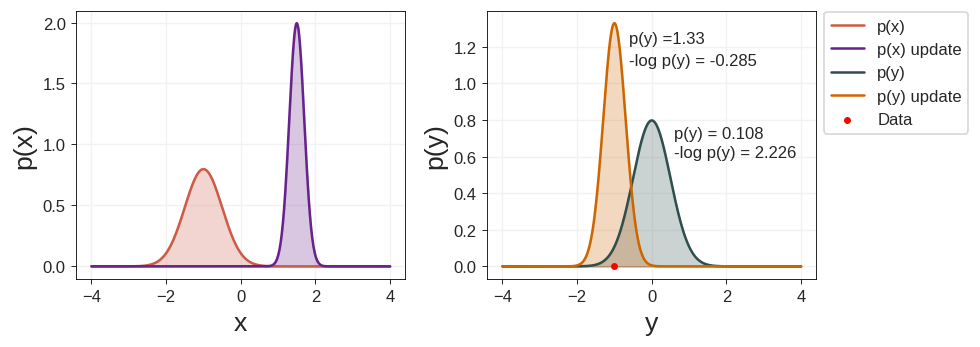

In [13]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1, 2, facecolor=(1,1,1), figsize=(7,3))

axes[0].plot(x_range, x_before, c="#CD5B45", label="p(x)")
axes[0].fill_between(x_range, x_before, alpha=0.25, color="#CD5B45")
axes[0].plot(x_range, x_update, c="#68228B", label="p(x) update")
axes[0].fill_between(x_range, x_update, alpha=0.25, color="#68228B")
axes[1].plot(y_range, y_after, c="#2F4F4F", label="p(y)")
axes[1].fill_between(y_range, y_after, alpha=0.25, color="#2F4F4F")
axes[1].plot(y_range, y_update, c="#CD6600", label="p(y) update")
axes[1].fill_between(y_range, y_update, alpha=0.25, color="#CD6600")
axes[1].scatter(x=-1, y=0, s=10, c="red", label="Data")

# Text
axes[1].text(-0.6, 1.22, f"p(y) ={evidence_update}", fontsize=10)
axes[1].text(-0.6, 1.1, f"-log p(y) = {surprisal_update}", fontsize=10)

axes[1].text(0.6, 0.7, f"p(y) = {evidence_after}", fontsize=10)
axes[1].text(0.6, 0.6, f"-log p(y) = {surprisal_after}", fontsize=10)

axes[0].set_xlabel("x", fontsize=16)
axes[1].set_xlabel("y", fontsize=16)
axes[0].set_ylabel("p(x)", fontsize=16)
axes[1].set_ylabel("p(y)", fontsize=16)

# Cosmetic changes and axes ranges
for ax in axes:
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)
    
fig.legend(loc="upper right", bbox_to_anchor=(1.17, 0.97), frameon=True)
fig.tight_layout()


## Comparing good and bad models

We can also sample from the evidence to see how well it reproduces the distribution of data we used as input. A good model should be able to reproduce the input distribution. 

Using $20$ samples we create three different evidence functions: the true distribution of the inputs, evidence derived from a good model, and evidence derived from a bad model.

In [14]:
n = 20
y_range = torch.linspace(-5, 5, 500)
y_true = Normal(loc=0, scale=0.75)
y_good = Normal(loc=-0.08, scale=0.87)
y_bad = Normal(loc=-2, scale=1.2)

<Figure size 768x576 with 0 Axes>

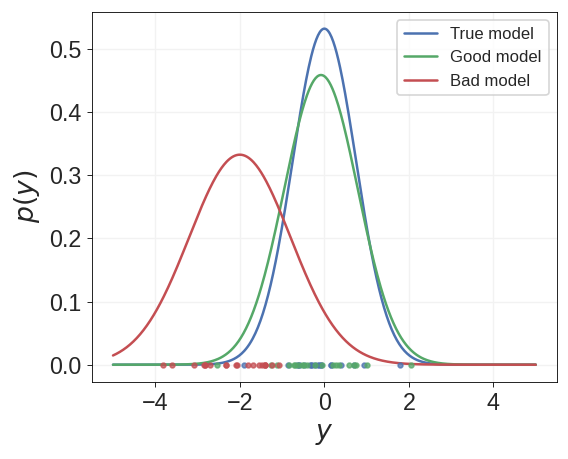

In [15]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1, 1, facecolor=(1,1,1), figsize=(5,4))

ax.plot(y_range, np.exp(y_true.log_prob(y_range)), label="True model")
ax.plot(y_range, np.exp(y_good.log_prob(y_range)), label="Good model")
ax.plot(y_range, np.exp(y_bad.log_prob(y_range)), label="Bad model")

torch.manual_seed(3434)
ax.scatter(y_true.sample([n]), np.zeros(n), s=8, alpha=0.75, zorder=8)
ax.scatter(y_good.sample([n]), np.zeros(n), s=8, alpha=0.75, zorder=8)
ax.scatter(y_bad.sample([n]), np.zeros(n), s=8, alpha=0.75, zorder=8)

ax.set_xlabel(r"$y$", fontsize=16)
ax.set_ylabel(r"$p(y)$", fontsize=16)

ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=14,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)

plt.legend(frameon=True)

The good model produces samples that are similar to and overlap with the true distribution. The bad model does not.